In [6]:
import os
import sys


# Set project root (PAIRSTRADING) relative to notebook location
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from config import *


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [14]:


#key_metrics_community_1_df = pd.read_csv('results/backtest_results/key_metrics_community_1_TEST.csv')
#key_metrics_community_2_df = pd.read_csv('results/backtest_results/key_metrics_community_2_(TEST).csv')

key_metrics_community_1_df = pd.read_csv(os.path.join(COMMUNITY_DETECTION_RESULTS_DIR,'backtest_results/key_metrics_community_1.csv'))
key_metrics_community_2_df = pd.read_csv(os.path.join(COMMUNITY_DETECTION_RESULTS_DIR,'backtest_results/key_metrics_community_2.csv'))


#Concat community 1 and community 2 dataframes

key_metrics_merged_df = pd.concat([key_metrics_community_1_df, key_metrics_community_2_df], axis=0)
key_metrics_merged_df.reset_index(drop=True, inplace=True)




In [15]:
#Sort key_metrics_merged_df by Total Return in descending order
#key_metrics_merged_df.sort_values(by='Total return (%)', ascending=False, inplace=True)

#key_metrics_merged_df.sort_values(by='Max drawdown (%)', inplace=True)

#key_metrics_merged_df.sort_values(by='Average entry beta', ascending=False, inplace=True)

key_metrics_merged_df.sort_values(by = 'Beta series returns MAD (%)')
#Allow full display of the dataframe
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


,Unnamed: 0,Pair,Total return (%),Sharpe ratio,Max drawdown (%),Number of trades,Non-stop loss win rate (%),Mean trade duration/Reversion speed from threshold (mins),Average entry beta,Mean Absolute Percent Delta Beta (%),Median Absolute Percent Delta Beta (%),Beta series returns std (%),Beta series returns MAD (%),Average S1 trade returns (%),Average S2 trade returns (%)
14,0,MANAUSDT_2024_5m ~ SANDUSDT_2024_5m,16.863636,0.298486,2.475377,108,74.074074,360.601852,0.896456,15.196455,8.735688,2.550662,0.160262,-0.350973,-0.231476
17,0,AXSUSDT_2024_5m ~ SANDUSDT_2024_5m,38.716948,0.116615,17.362418,129,62.790698,376.627907,16.063325,20.432435,11.209689,12.027075,0.213571,-0.554746,-0.595318
12,0,AXSUSDT_2024_5m ~ MANAUSDT_2024_5m,1.650123,0.005367,28.872530,117,51.282051,360.128205,16.500546,23.322713,12.777060,45.271853,0.228001,-0.389949,-0.255736
71,0,FLOWUSDT_2024_5m ~ SANDUSDT_2024_5m,7.703513,0.043582,13.443118,131,63.358779,409.007634,2.028629,29.750001,15.280151,65.371791,0.259318,-0.157743,-0.074199
82,0,FLOWUSDT_2024_5m ~ MANAUSDT_2024_5m,16.474751,0.094553,11.839234,123,64.227642,402.073171,1.927036,58.570995,15.444809,77.327718,0.275141,-0.004367,-0.217613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0,SEIUSDT_2024_5m ~ CRVUSDT_2024_5m,-21.915755,-0.065852,31.394747,107,57.009346,410.373832,0.974852,146.541026,43.720564,193.041267,0.676158,0.372112,0.005936
34,0,INJUSDT_2024_5m ~ LDOUSDT_2024_5m,2.279384,0.006766,21.957747,107,51.401869,429.766355,5.465398,375.169852,55.166012,152.284789,0.726643,-0.244682,-0.196042
35,0,JTOUSDT_2024_5m ~ NEARUSDT_2024_5m,44.056323,0.118132,28.030595,111,63.963964,406.981982,0.328136,118.315427,49.057422,217.800363,0.768635,0.291213,0.215316
91,0,LTCUSDT_2024_5m ~ MKRUSDT_2024_5m,11.392324,0.035337,19.942892,126,68.253968,412.738095,0.009459,291.306272,53.748052,7077.408552,0.822251,0.312800,0.151625


In [16]:
#Drop columns: Mean Absolute Percent Delta Beta (%) and Beta series returns std (%)
key_metrics_merged_df.drop(columns=['Mean Absolute Percent Delta Beta (%)', 'Beta series returns std (%)'], inplace=True)


In [17]:
key_metrics_merged_df

,Unnamed: 0,Pair,Total return (%),Sharpe ratio,Max drawdown (%),Number of trades,Non-stop loss win rate (%),Mean trade duration/Reversion speed from threshold (mins),Average entry beta,Median Absolute Percent Delta Beta (%),Beta series returns MAD (%),Average S1 trade returns (%),Average S2 trade returns (%)
0,0,EGLDUSDT_2024_5m ~ SEIUSDT_2024_5m,-21.660009,-0.049140,40.249726,122,50.819672,432.049180,3.804728e+01,29.706214,0.477634,0.062149,0.447067
1,0,ATOMUSDT_2024_5m ~ CRVUSDT_2024_5m,-19.461046,-0.050013,33.668677,105,49.523810,449.190476,9.792938e+00,29.687707,0.438848,0.452526,-0.070664
2,0,HBARUSDT_2024_5m ~ GRTUSDT_2024_5m,-29.918300,-0.048496,52.248046,116,59.482759,411.681034,2.041727e-01,25.675588,0.447669,0.904631,0.202553
3,0,IOTAUSDT_2024_5m ~ XTZUSDT_2024_5m,12.442100,0.050195,16.365735,119,57.983193,394.117647,2.156020e-01,22.736492,0.348696,-0.071609,0.084184
4,0,XTZUSDT_2024_5m ~ SANDUSDT_2024_5m,35.183622,0.244260,11.460668,121,72.727273,386.735537,1.514903e+00,17.218973,0.295141,0.322982,0.123132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,LTCUSDT_2024_5m ~ MKRUSDT_2024_5m,11.392324,0.035337,19.942892,126,68.253968,412.738095,9.458661e-03,53.748052,0.822251,0.312800,0.151625
92,0,NEXOUSDT_2024_5m ~ BTCUSDT_2024_5m,97.367068,0.363456,4.881089,136,73.529412,278.014706,2.171809e-05,16.011991,0.447700,0.245495,0.213949
93,0,SHIBUSDT_2024_5m ~ LTCUSDT_2024_5m,2.519668,0.003800,48.475647,130,65.384615,391.461538,2.568786e-07,24.353181,0.503549,0.316489,0.063250
94,0,BCHUSDT_2024_5m ~ MKRUSDT_2024_5m,4.187982,0.009022,27.138452,125,68.800000,387.000000,5.012612e-02,52.332836,0.838561,0.069303,-0.015250


In [7]:
# key_metrics_merged_df.to_csv('key_metrics_merged_df.csv', index=False)

In [18]:
returns_community_1 = key_metrics_community_1_df['Total return (%)'].values
returns_community_2 = key_metrics_community_2_df['Total return (%)'].values

# Find relationships
---

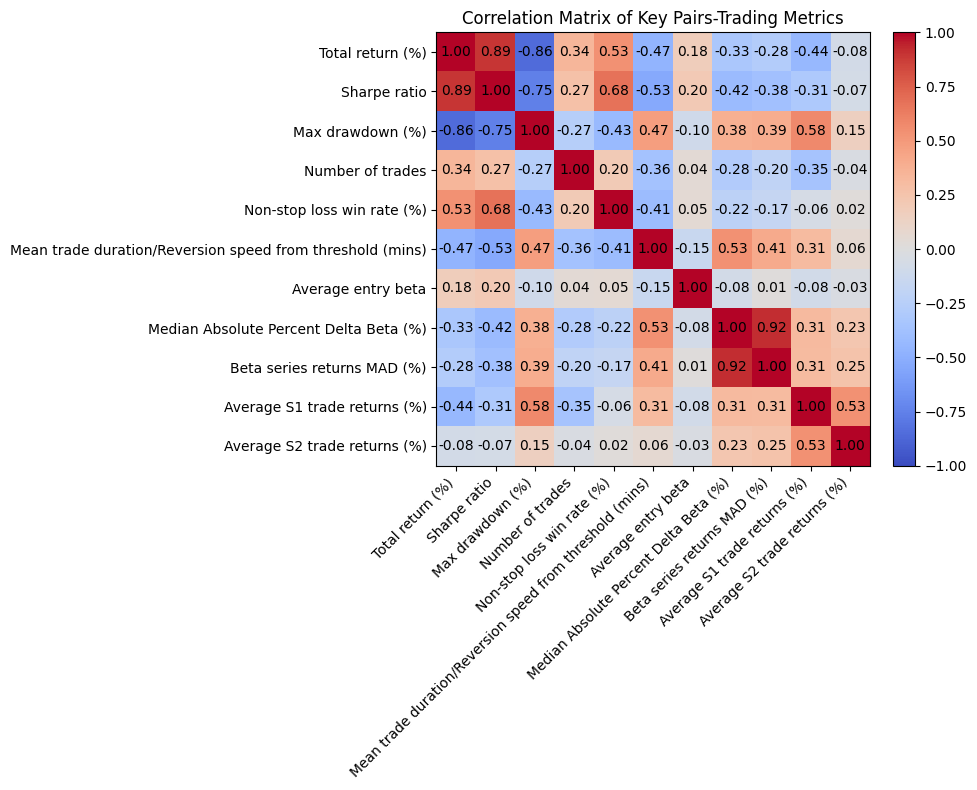

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load your CSV (adjust path as needed)
df = key_metrics_merged_df

# 2. Select only the numeric columns you care about
numeric_cols = [
    'Total return (%)',
    'Sharpe ratio',
    'Max drawdown (%)',
    'Number of trades',
    'Non-stop loss win rate (%)',
    'Mean trade duration/Reversion speed from threshold (mins)',
    'Average entry beta',
    'Median Absolute Percent Delta Beta (%)',
    'Beta series returns MAD (%)',
    'Average S1 trade returns (%)',
    'Average S2 trade returns (%)'
]
data = df[numeric_cols]

# 3. Compute the correlation matrix
corr = data.corr()

# 4. Plot it with matplotlib
plt.figure(figsize=(10, 8))
im = plt.imshow(corr, 
                cmap='coolwarm', 
                vmin=-1, vmax=+1, 
                interpolation='none')
plt.colorbar(im, fraction=0.046, pad=0.04)

# 5. Label axes
ticks = np.arange(len(numeric_cols))
plt.xticks(ticks, numeric_cols, rotation=45, ha='right')
plt.yticks(ticks, numeric_cols)

# 6. Annotate correlation values
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        val = corr.iloc[i, j]
        plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

plt.title("Correlation Matrix of Key Pairs-Trading Metrics")
plt.tight_layout()
plt.show()


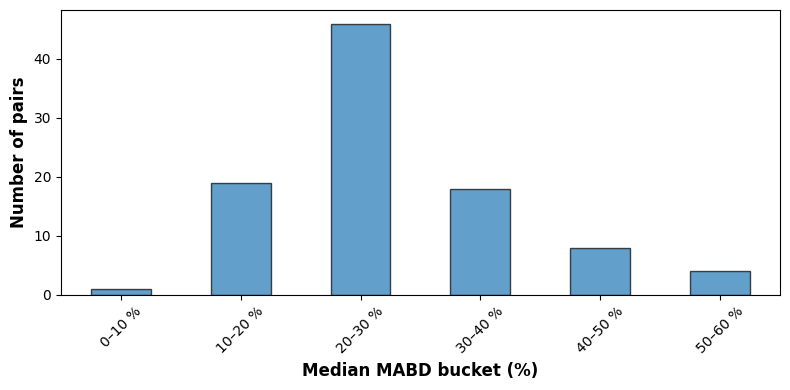

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Define your bins exactly as before:
bin_edges = np.arange(0, 61, 10)  # [0,10,20,30,40,50,60]
bin_labels = [f"{i}–{i+10} %" for i in bin_edges[:-1]]

# 2) Cut your series into those bins
df = key_metrics_merged_df.copy()   # or whatever your DataFrame is called
df["Δβ_bucket"] = pd.cut(
    df["Median Absolute Percent Delta Beta (%)"],
    bins=bin_edges,
    labels=bin_labels,
    right=False,    # so that 0–10 means [0,10)
)

# 3) Count how many pairs in each bucket
counts = df["Δβ_bucket"].value_counts().reindex(bin_labels, fill_value=0)

# 4) Plot
plt.figure(figsize=(8,4))
counts.plot(kind="bar", color="C0", edgecolor="k", alpha=0.7)
plt.xlabel("Median MABD bucket (%)", fontsize=12, fontweight='bold')
plt.ylabel("Number of pairs", fontsize=12, fontweight='bold')
#plt.title("Number of pairs in each MABD bucket", fontsize=14, fontweight='bold')
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()


#plt.savefig('results/community_detection/MABD_findings/MABD_buckets.png', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(COMMUNITY_DETECTION_RESULTS_DIR, "MABD_findings/MABD_buckets.png"), dpi = 300, bbox_inches='tight')
plt.show()


/var/folders/7n/k8zdsrrn3lq7d9yh2c0r1m580000gp/T/ipykernel_91058/317566963.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('β_bin')[y.name].mean()


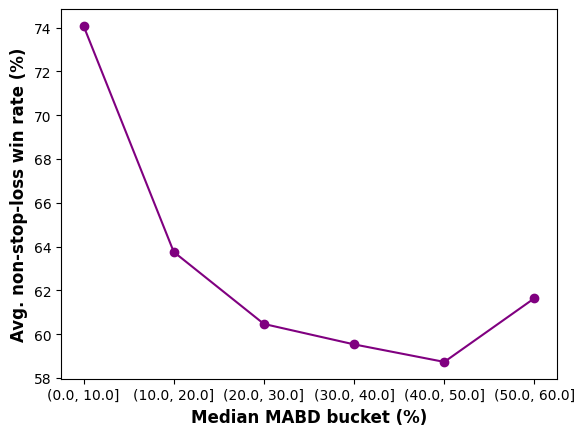

In [21]:
import numpy as np

x = df['Median Absolute Percent Delta Beta (%)']
y = df['Non-stop loss win rate (%)']

# define your buckets, e.g. every 10%
bins = np.arange(0, x.max()+10, 10)
df['β_bin'] = pd.cut(x, bins)

# compute mean win-rate in each bin
grouped = df.groupby('β_bin')[y.name].mean()

# plot
grouped.plot(marker='o', color = 'purple')
plt.xlabel('Median MABD bucket (%)', fontsize=12, fontweight='bold')
plt.ylabel('Avg. non-stop-loss win rate (%)' , fontsize=12, fontweight='bold') 
#plt.title('Binned Win‐Rate vs Δβ' , fontsize=14, fontweight='bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
#plt.savefig('results/community_detection/MABD_findings/MABD_win_rate.png', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(COMMUNITY_DETECTION_RESULTS_DIR, "MABD_findings/MABD_win_rate.png"), dpi = 300, bbox_inches='tight')


plt.show()

Sharp drop at low Δβ
In the first bucket (0–10 % median Δβ), your average non-stop-loss win-rate is about 74 %.

Monotonic decline
As you move to higher Δβ buckets, it steadily falls:

    10–20 % ⇒ ~63.8 %

    20–30 % ⇒ ~60.5 %

    30–40 % ⇒ ~59.5 %

    40–50 % ⇒ ~58.7 %

Small-sample uptick at highest bin

The rise back to ~61.6 % in the 50–60 % bin is almost certainly noise, since you only have a handful of pairs with such extreme Δβ.

Delta-drift really matters. Pairs whose actual hedge ratio drifts (in median) by less than 10 % off their entry β win nearly 75 % of the time.

Once your median Δβ exceeds 20 %, your win-rate falls below 61 %.

Beyond 40 % drift, you’re down below 59 % wins.

/var/folders/7n/k8zdsrrn3lq7d9yh2c0r1m580000gp/T/ipykernel_91058/2985540848.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


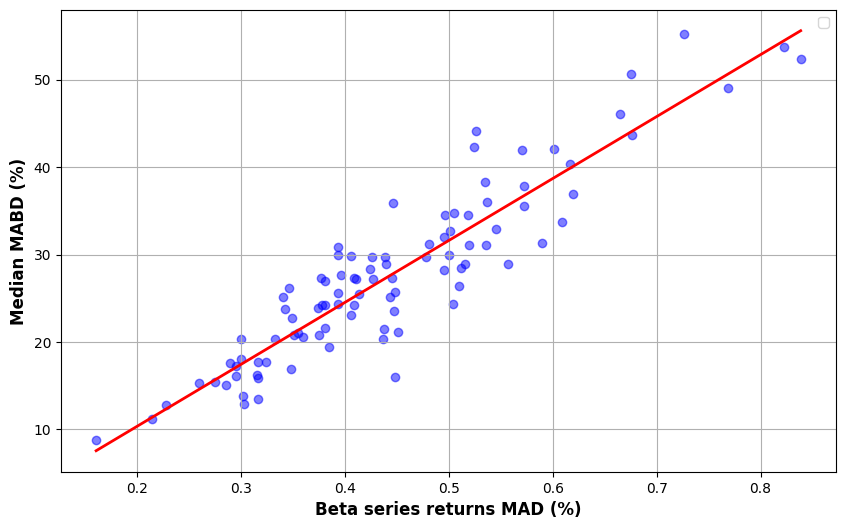

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Pull out your x and y arrays
x = key_metrics_merged_df['Beta series returns MAD (%)'].values
y = key_metrics_merged_df['Median Absolute Percent Delta Beta (%)'].values

# Fit a straight line y = m*x + b
m, b = np.polyfit(x, y, deg=1)

# Prepare a smooth x-range for plotting the line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)

# Overlay regression line
plt.plot(
    x_line, y_line,
    color='red', lw=2,
    #label=f'Fit: win_rate = {m:.2f}·MAD + {b:.1f}'
)


plt.xlabel('Beta series returns MAD (%)', fontsize=12, fontweight='bold')
plt.ylabel('Median MABD (%)', fontsize=12, fontweight='bold')
#plt.title('Beta series returns MAD vs Median MABD', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right')
plt.grid(True)
#plt.savefig('results/community_detection/MABD_findings/MABD_vs_Beta_series_returns_MAD.png', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(COMMUNITY_DETECTION_RESULTS_DIR, "MABD_findings/MABD_vs_Beta_series_returns_MAD.png"), dpi = 300, bbox_inches='tight')

plt.show()


/var/folders/7n/k8zdsrrn3lq7d9yh2c0r1m580000gp/T/ipykernel_91058/2491347167.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('β_bin')[y.name].mean()


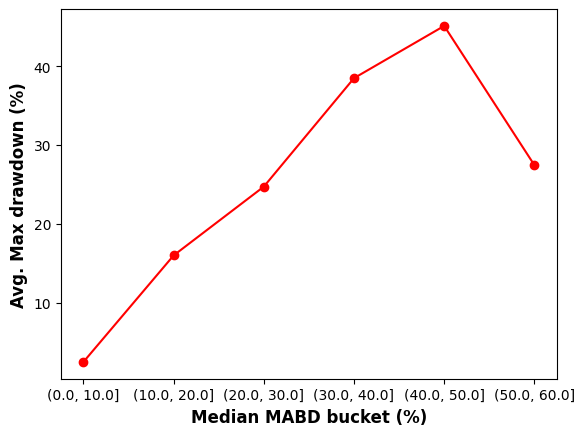

In [23]:
import numpy as np

x = df['Median Absolute Percent Delta Beta (%)']
y = df['Max drawdown (%)']

# define your buckets, e.g. every 10%
bins = np.arange(0, x.max()+10, 10)
df['β_bin'] = pd.cut(x, bins)

# compute mean win-rate in each bin
grouped = df.groupby('β_bin')[y.name].mean()

# plot
grouped.plot(marker='o', color = 'red')
plt.xlabel('Median MABD bucket (%)', fontsize=12, fontweight='bold')
plt.ylabel('Avg. Max drawdown (%)', fontsize=12, fontweight='bold')
#plt.title('Binned Max drawdown vs MABD ', fontsize=14, fontweight='bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
#plt.savefig('results/community_detection/MABD_findings/MABD_draw_down.png', dpi=300, bbox_inches='tight')

plt.savefig(os.path.join(COMMUNITY_DETECTION_RESULTS_DIR, "MABD_findings/MABD_draw_down.png"), dpi = 300, bbox_inches='tight')


plt.show()

In [14]:
grouped

β_bin
(0.0, 10.0]      2.475377
(10.0, 20.0]    15.992184
(20.0, 30.0]    24.720523
(30.0, 40.0]    38.487888
(40.0, 50.0]    45.118806
(50.0, 60.0]    27.458474
Name: Max drawdown (%), dtype: float64

# Choosing final pairs
---

In [15]:
key_metrics_merged_df_selection = key_metrics_merged_df.sort_values(by = 'Beta series returns MAD (%)')
key_metrics_merged_df_selection.head(10)

,Unnamed: 0,Pair,Total return (%),Sharpe ratio,Max drawdown (%),Number of trades,Non-stop loss win rate (%),Mean trade duration/Reversion speed from threshold (mins),Average entry beta,Median Absolute Percent Delta Beta (%),Beta series returns MAD (%),Average S1 trade returns (%),Average S2 trade returns (%)
14,0,MANAUSDT_2024_5m ~ SANDUSDT_2024_5m,16.863636,0.298486,2.475377,108,74.074074,360.601852,0.896456,8.735688,0.160262,-0.350973,-0.231476
17,0,AXSUSDT_2024_5m ~ SANDUSDT_2024_5m,38.716948,0.116615,17.362418,129,62.790698,376.627907,16.063325,11.209689,0.213571,-0.554746,-0.595318
12,0,AXSUSDT_2024_5m ~ MANAUSDT_2024_5m,1.650123,0.005367,28.872530,117,51.282051,360.128205,16.500546,12.777060,0.228001,-0.389949,-0.255736
71,0,FLOWUSDT_2024_5m ~ SANDUSDT_2024_5m,7.703513,0.043582,13.443118,131,63.358779,409.007634,2.028629,15.280151,0.259318,-0.157743,-0.074199
82,0,FLOWUSDT_2024_5m ~ MANAUSDT_2024_5m,16.474751,0.094553,11.839234,123,64.227642,402.073171,1.927036,15.444809,0.275141,-0.004367,-0.217613
61,0,SANDUSDT_2024_5m ~ ALGOUSDT_2024_5m,17.780213,0.107140,8.472286,111,65.765766,352.567568,1.927990,15.113657,0.285127,-0.035526,0.007011
18,0,IOTAUSDT_2024_5m ~ SANDUSDT_2024_5m,32.799352,0.180900,6.721377,133,61.654135,343.308271,0.486813,17.593201,0.289002,0.204008,0.057239
51,0,AXSUSDT_2024_5m ~ FLOWUSDT_2024_5m,30.630583,0.094766,14.606047,140,64.285714,330.607143,7.472974,16.113284,0.294782,-0.276606,0.128172
4,0,XTZUSDT_2024_5m ~ SANDUSDT_2024_5m,35.183622,0.244260,11.460668,121,72.727273,386.735537,1.514903,17.218973,0.295141,0.322982,0.123132
15,0,IOTAUSDT_2024_5m ~ MANAUSDT_2024_5m,31.507574,0.160683,9.236115,131,70.229008,368.435115,0.438988,20.323007,0.299687,-0.086534,0.126734


### I choose the top 10 pairs filtered by Beta series returns MAD (%) from lowest to highest. These pairs have the most consistent relationship, and hence have a higehr chance of performing better in the future, as they are less liekly to result in trades with poor delta neutrality. Filtering based on returns is poor, because you can still achieve high resturns if you have poor delta neutrality but get lucky with one of the legs that you are over exposed to going in your desired direction with high volatility. In future those returns can flip just as easily if you continue to trade  a pair with a volatile relationship - you might not get as lucky next time you are over exposed to one side of the market and that side goes against you...

# Value of community detection
---

* ## P value distirbution

In [16]:
# community_1_pairs = pd.read_csv('results/pairs/pairs_community_1.csv')
# community_2_pairs = pd.read_csv('results/pairs/pairs_community_2.csv')
# cross_communnity_pairs = pd.read_csv('results/pairs/pairs_cross_communities.csv')


# intra_community_pairs = pd.concat([community_1_pairs, community_2_pairs], axis=0)
# inter_community_pairs = cross_communnity_pairs


In [17]:
# print(f"Average p_value intra community: {intra_community_pairs['pvalue'].mean()}")
# print(f"Average p_value inter community: {inter_community_pairs['pvalue'].mean()}")

In [18]:
# #Plot distributions of p_values for each community in a separate subplot

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.hist(intra_community_pairs['pvalue'], bins=30, color='blue', alpha=0.7)
# plt.axvline(intra_community_pairs['pvalue'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
# plt.axvline(intra_community_pairs['pvalue'].median(), color='blue', linestyle='dotted', linewidth=1, label='Median')
# plt.title('Intra-community P-values')
# plt.xlabel('P-value')
# plt.ylabel('Frequency')
# plt.subplot(1, 2, 2)
# plt.hist(inter_community_pairs['pvalue'], bins=30, color='red', alpha=0.7)
# plt.axvline(inter_community_pairs['pvalue'].mean(), color='black', linestyle='dashed', linewidth=1, label='Mean')
# plt.axvline(inter_community_pairs['pvalue'].median(), color='black', linestyle='dotted', linewidth=1, label='Median')
# plt.title('Inter-community P-values')
# plt.xlabel('P-value')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.legend()
# plt.show()


In [19]:
# #Plot distributions of p_values for each community on the same plot
# plt.figure(figsize=(12, 6))
# plt.hist(intra_community_pairs['pvalue'], bins=30, color='blue', alpha=0.7, label='Intra-community', density=True)
# plt.hist(inter_community_pairs['pvalue'], bins=30, color='red', alpha=0.7, label='Inter-community', density=True)

# plt.legend()


* ## Key metrics comparison


In [27]:
#key_metrics_inter_communities = pd.read_csv('results/backtest_results/key_metrics_cross_community.csv')

key_metrics_inter_communities = pd.read_csv(os.path.join(COMMUNITY_DETECTION_RESULTS_DIR, 'backtest_results/key_metrics_cross_community.csv'))

key_metrics_intra_communities = pd.concat([key_metrics_community_1_df, key_metrics_community_2_df], axis=0)


In [29]:
key_metrics_inter_communities_sorted = key_metrics_inter_communities.sort_values(by = 'Sharpe ratio', ascending=False)
key_metrics_intra_communities_sorted = key_metrics_intra_communities.sort_values(by = 'Beta series returns MAD (%)')
key_metrics_intra_communities_sorted

,Unnamed: 0,Pair,Total return (%),Sharpe ratio,Max drawdown (%),Number of trades,Non-stop loss win rate (%),Mean trade duration/Reversion speed from threshold (mins),Average entry beta,Mean Absolute Percent Delta Beta (%),Median Absolute Percent Delta Beta (%),Beta series returns std (%),Beta series returns MAD (%),Average S1 trade returns (%),Average S2 trade returns (%)
14,0,MANAUSDT_2024_5m ~ SANDUSDT_2024_5m,16.863636,0.298486,2.475377,108,74.074074,360.601852,0.896456,15.196455,8.735688,2.550662,0.160262,-0.350973,-0.231476
17,0,AXSUSDT_2024_5m ~ SANDUSDT_2024_5m,38.716948,0.116615,17.362418,129,62.790698,376.627907,16.063325,20.432435,11.209689,12.027075,0.213571,-0.554746,-0.595318
12,0,AXSUSDT_2024_5m ~ MANAUSDT_2024_5m,1.650123,0.005367,28.872530,117,51.282051,360.128205,16.500546,23.322713,12.777060,45.271853,0.228001,-0.389949,-0.255736
71,0,FLOWUSDT_2024_5m ~ SANDUSDT_2024_5m,7.703513,0.043582,13.443118,131,63.358779,409.007634,2.028629,29.750001,15.280151,65.371791,0.259318,-0.157743,-0.074199
82,0,FLOWUSDT_2024_5m ~ MANAUSDT_2024_5m,16.474751,0.094553,11.839234,123,64.227642,402.073171,1.927036,58.570995,15.444809,77.327718,0.275141,-0.004367,-0.217613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0,SEIUSDT_2024_5m ~ CRVUSDT_2024_5m,-21.915755,-0.065852,31.394747,107,57.009346,410.373832,0.974852,146.541026,43.720564,193.041267,0.676158,0.372112,0.005936
34,0,INJUSDT_2024_5m ~ LDOUSDT_2024_5m,2.279384,0.006766,21.957747,107,51.401869,429.766355,5.465398,375.169852,55.166012,152.284789,0.726643,-0.244682,-0.196042
35,0,JTOUSDT_2024_5m ~ NEARUSDT_2024_5m,44.056323,0.118132,28.030595,111,63.963964,406.981982,0.328136,118.315427,49.057422,217.800363,0.768635,0.291213,0.215316
8,0,LTCUSDT_2024_5m ~ MKRUSDT_2024_5m,11.392324,0.035337,19.942892,126,68.253968,412.738095,0.009459,291.306272,53.748052,7077.408552,0.822251,0.312800,0.151625


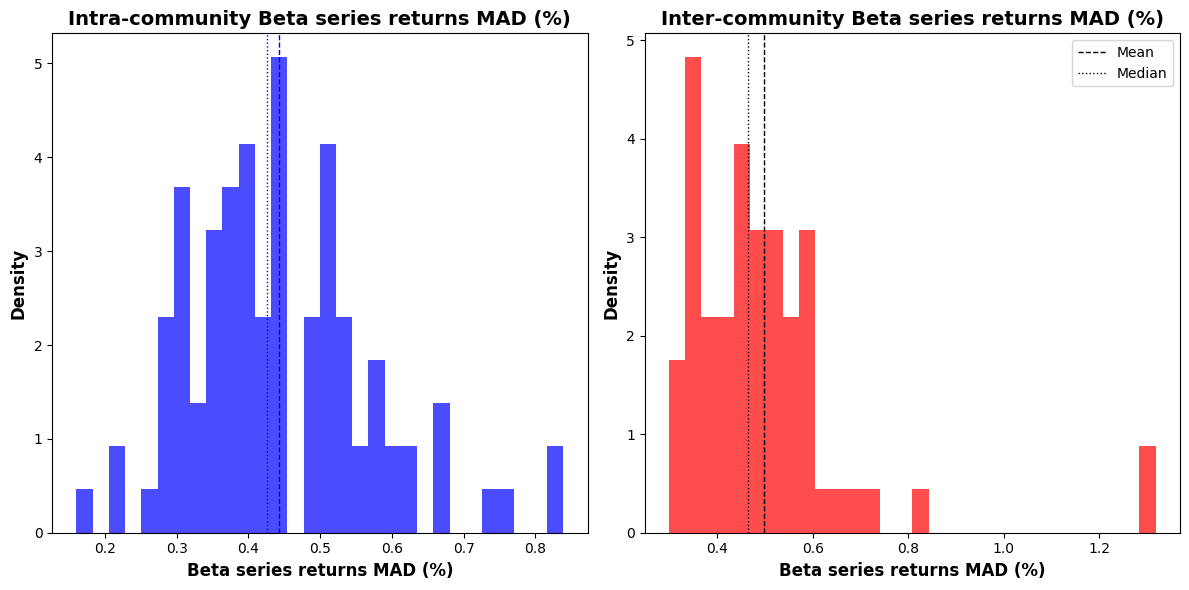

In [30]:
#Plot Average Beta series returns MAD (%) for each community (USING DENSITIES, AS COUNTS ARE BIASED BASED ON NUMBER OF PAIRS (SAMPLE SIZE))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(key_metrics_intra_communities['Beta series returns MAD (%)'], bins=30, color='blue', alpha=0.7, density=True)
plt.axvline(key_metrics_intra_communities['Beta series returns MAD (%)'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(key_metrics_intra_communities['Beta series returns MAD (%)'].median(), color='blue', linestyle='dotted', linewidth=1, label='Median')
plt.title('Intra-community Beta series returns MAD (%)', fontsize=14, fontweight='bold')
plt.xlabel('Beta series returns MAD (%)', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)
plt.hist(key_metrics_inter_communities['Beta series returns MAD (%)'], bins=30, color='red', alpha=0.7, density=True)
plt.axvline(key_metrics_inter_communities['Beta series returns MAD (%)'].mean(), color='black', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(key_metrics_inter_communities['Beta series returns MAD (%)'].median(), color='black', linestyle='dotted', linewidth=1, label='Median')
plt.title('Inter-community Beta series returns MAD (%)', fontsize=14, fontweight='bold')
plt.xlabel('Beta series returns MAD (%)', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.legend()

#plt.savefig('results/community_detection/value_of_community_detection/MAD_intra_vs_inter_communities.png', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(COMMUNITY_DETECTION_RESULTS_DIR, "value_of_community_detection/MAD_intra_vs_inter_communities.png"), dpi = 300, bbox_inches='tight')

plt.show()

/var/folders/7n/k8zdsrrn3lq7d9yh2c0r1m580000gp/T/ipykernel_91058/676708194.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


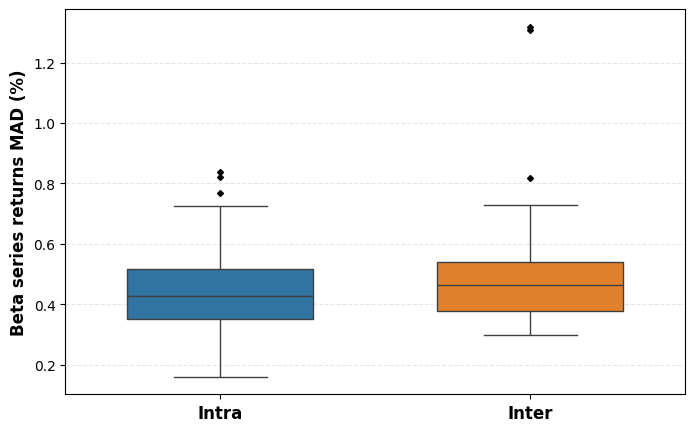

In [31]:


#This visualization provides a clear comparison of the "Beta series returns MAD (%)" metric for intra- and inter-community pairs. The boxplot summarizes the distribution (e.g., median, interquartile range, and outliers), while the strip plot shows the individual data points, offering additional detail about the spread and density of the data.

# 1) tag each dataframe so we know which is which
intra = key_metrics_intra_communities.copy()
intra['group'] = 'Intra'

inter = key_metrics_inter_communities.copy()
inter['group'] = 'Inter'

# 2) concat them into one long DataFrame
df = pd.concat([intra, inter], axis=0)

# 3) plot
plt.figure(figsize=(8,5)) 
# Define flierprops to show outliers as diamonds
flierprops = dict(marker='D', markerfacecolor='k', markersize=3,
                  linestyle='none', markeredgecolor='k')
ax = sns.boxplot(
    x='group', #The x axis represents the group column, which separates the data into the 'intra' and 'inter' groups.
    y='Beta series returns MAD (%)',
    data=df,
    palette=['C0','C1'],
    showfliers=True,
    flierprops = flierprops,    # show outlier points as diamonds
    width=0.6
)


# Make the x-axis tick labels bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(12)


# sns.stripplot( #This adds individual data points to the plot, providing a more granular view of the distribution.
#     x='group',
#     y='Beta series returns MAD (%)',
#     data=df,
#     color='k',
#     size=4,
#     jitter=0.2,
#     alpha=0.6
# )

#plt.title("β-Series MAD: Intra- vs. Inter-Community Pairs", fontsize=14, fontweight='bold')
plt.xlabel("", fontsize=12, fontweight='bold')
plt.ylabel("Beta series returns MAD (%)", fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)
#plt.savefig('results/community_detection/value_of_community_detection/MAD_box_plot_intra_vs_inter_communities.png', dpi=300, bbox_inches='tight')

plt.savefig(os.path.join(COMMUNITY_DETECTION_RESULTS_DIR, "value_of_community_detection/MAD_box_plot_intra_vs_inter_communities.png"), dpi = 300, bbox_inches='tight')


plt.show()


In [24]:
inter

,Unnamed: 0,Pair,Total return (%),Sharpe ratio,Max drawdown (%),Number of trades,Non-stop loss win rate (%),Mean trade duration/Reversion speed from threshold (mins),Average entry beta,Mean Absolute Percent Delta Beta (%),Median Absolute Percent Delta Beta (%),Beta series returns std (%),Beta series returns MAD (%),Average S1 trade returns (%),Average S2 trade returns (%),group
0,0,CRVUSDT_2024_5m ~ XRPUSDT_2024_5m,14.209488,0.056276,18.666838,115,68.695652,377.304348,1.075972,178.959840,29.903360,236.492087,0.522966,-0.261875,-0.013814,inter
1,0,SANDUSDT_2024_5m ~ XRPUSDT_2024_5m,31.166261,0.159852,7.766876,132,73.484848,400.340909,0.976142,1282.012137,25.148400,93.266763,0.406693,0.047070,-0.028946,inter
2,0,AXSUSDT_2024_5m ~ XRPUSDT_2024_5m,44.720606,0.206275,8.982768,136,64.705882,401.139706,14.411694,199.600662,30.291438,174.784159,0.453224,-0.152745,-0.093351,inter
3,0,ATOMUSDT_2024_5m ~ XRPUSDT_2024_5m,14.337482,0.055092,14.473216,122,60.655738,418.401639,15.589608,83.489463,26.892008,141.153992,0.515961,0.027086,-0.006982,inter
4,0,AXSUSDT_2024_5m ~ DOTUSDT_2024_5m,6.081682,0.035353,13.093735,127,66.929134,368.740157,0.883854,89.089021,16.426911,37.135479,0.348965,-0.051515,0.104283,inter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,GRTUSDT_2024_5m ~ LTCUSDT_2024_5m,-19.284766,-0.048446,36.591238,115,60.000000,411.043478,0.003716,74.832794,34.676317,587.045362,0.599613,-0.091257,-0.047167,inter
63,0,WLDUSDT_2024_5m ~ VETUSDT_2024_5m,49.578212,0.114182,35.065635,122,54.918033,374.877049,130.274932,90.921196,32.569222,103.350373,0.537705,0.166309,0.108683,inter
64,0,ALGOUSDT_2024_5m ~ XLMUSDT_2024_5m,48.076989,0.401852,3.429823,123,78.861789,316.504065,2.349356,45.820453,17.009685,36.284840,0.328494,-0.423903,-0.267285,inter
65,0,INJUSDT_2024_5m ~ ADAUSDT_2024_5m,-9.483252,-0.032774,29.159027,115,51.304348,454.130435,63.012410,185.966112,31.512088,115.708276,0.556156,0.110690,0.217171,inter


In [32]:
from scipy.stats import mannwhitneyu

stat, p_one_sided = mannwhitneyu(
    key_metrics_inter_communities['Beta series returns MAD (%)'],
    key_metrics_intra_communities['Beta series returns MAD (%)'],
    alternative='greater'
)

print(f"Mann–Whitney U statistic: {stat:.3f}")
print(f"one-sided p-value: {p_one_sided:.3g}")

if p_one_sided < 0.05:
    print("→ Inter-community β-MAD is statistically significantly larger than intra-community (p < 0.05).")
else:
    print("→ Cannot conclude inter-community β-MAD is larger (at α=0.05).")


Mann–Whitney U statistic: 3813.000
one-sided p-value: 0.0221
→ Inter-community β-MAD is statistically significantly larger than intra-community (p < 0.05).


### Note: The Mann–Whitney U test inherently accounts for differing sample sizes via the way UU is calculated and how its null distribution depends on n1n1​ and n2n2​